## Exercises

Answer the  following questions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

stocks_filename = 'stocks_data.csv'
stocks_df = pd.read_csv(stocks_filename)

### Q1: Restore the following image.

`df1`, `df2`, `df3` and `df4` all contain data for part of an image. You can visualize the data of an image contained in `df` using `plt.imshow(df)`. Recreate the original image by appropriately combining the different parts.

Hint: your final picture should look like [this](https://cdn-images-1.medium.com/max/1600/1*i1vVm3EqqDIkyucD0079wg.jpeg) (with different colors).

In [ ]:
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
df3 = pd.read_csv('df3.csv')
df4 = pd.read_csv('df4.csv')

In [ ]:
plt.imshow(df1)

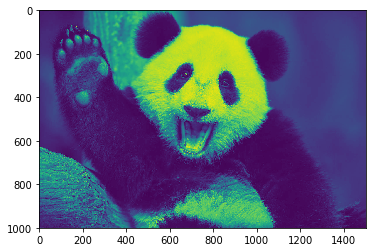

In [9]:
plt.imshow(pd.concat([pd.concat([df1, df2], axis=1), pd.concat([df3, df4], axis=1)]))

### Q2: Stack `df1` and `df2` in a way that restores the original index from `stocks_df` by appropriately choosing keyword arguments.

In [9]:
df1 = stocks_df.iloc[:stocks_df.shape[0] // 2, 0:3]
df2 = stocks_df.iloc[stocks_df.shape[0] // 2:, 0:3].reset_index(drop=True)

In [10]:
pd.concat([df1, df2], ignore_index=True)

,ticker,open,close
0,AAPL,0.513393,0.513393
1,AAPL,0.488839,0.486607
2,AAPL,0.453125,0.450893
3,AAPL,0.462054,0.462054
4,AAPL,0.475446,0.475446
5,AAPL,0.504464,0.504464
6,AAPL,0.529018,0.529018
7,AAPL,0.551339,0.551339
8,AAPL,0.580357,0.580357
9,AAPL,0.633929,0.633929


### Q3: Explain how to merge on indices using `pd.merge`.

Hint: Look up the documentation.

Suppose you have two dataframes `df1` and `df2`. 
- To merge on indices of `df1` and `key` of `df2`: `pd.merge(df1, df2, left_index='True', right_on='key')`
- To merge on indices of `df2` and `key` of `df1`: `pd.merge(df1, df2, left_on='key', right_index=True)`
- To merge on both indices: `pd.merge(df1, df2, left_index='key', right_index=True)`

### Q4: Explain what the purpose of `drop_duplicates` before merging is in the following example:

```python
np.random.seed(1)

set1 = np.random.choice(stocks_df.ticker.unique(), size=50)
set2 = np.random.choice(stocks_df.ticker.unique(), size=50)

df1 = stocks_df.loc[stocks_df.ticker.isin(set1), ['ticker', 'adj_close', 'volume']]
df2 = stocks_df.loc[stocks_df.ticker.isin(set2), ['ticker', 'name', 'industry']].drop_duplicates()

pd.merge(df1, df2)
```

`drop_duplicates` ensures that we have many-to-one merge and not a many-to-many merge, which would be wasteful because the same information is repeated multiple times.